<a href="https://colab.research.google.com/github/Gene9513/Diplomado/blob/main/fligh%20price%20tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('flight_price.csv')

# **ANALISIS EXPLORATORIO**

In [4]:
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [4]:
print(df.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [6]:
print(df.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [6]:
sns.set(style="whitegrid")

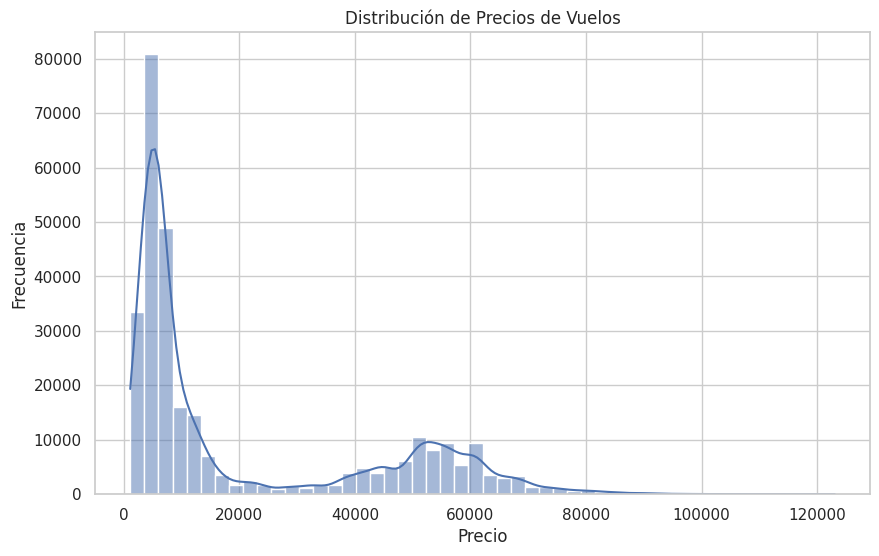

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios de Vuelos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

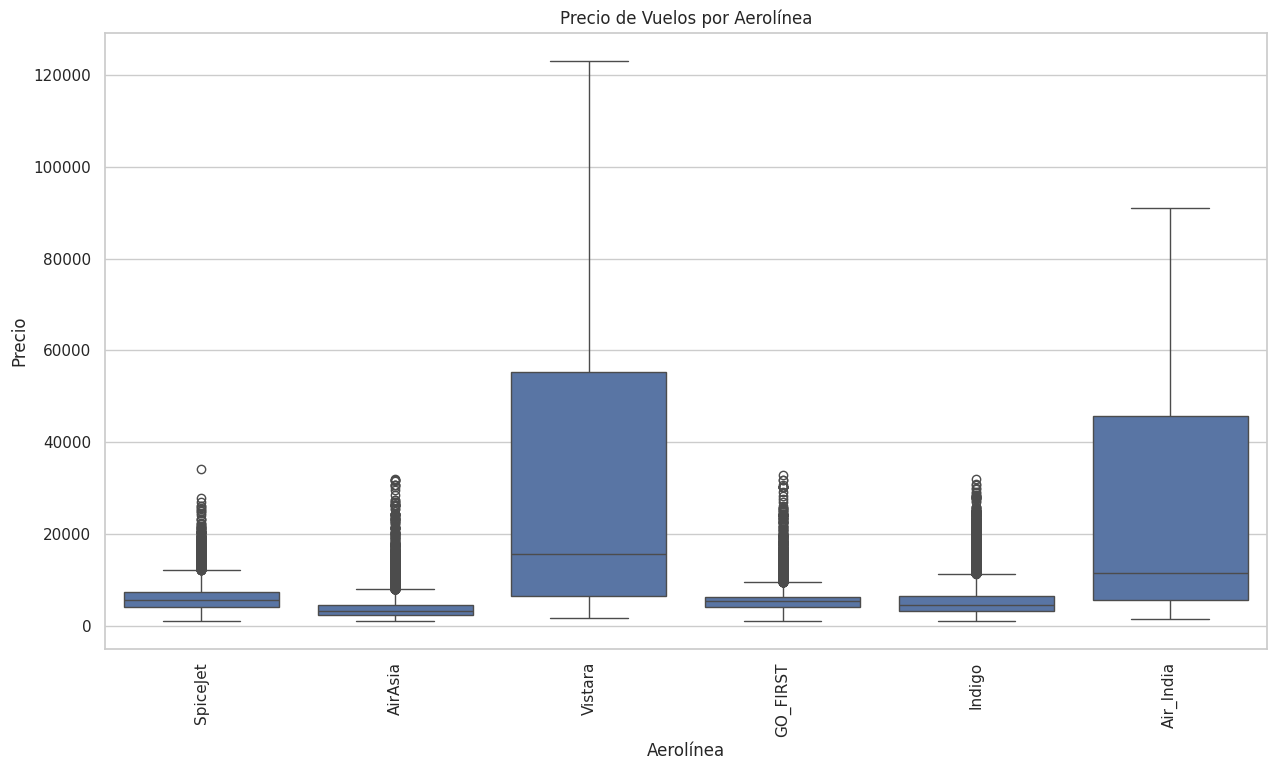

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Precio de Vuelos por Aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

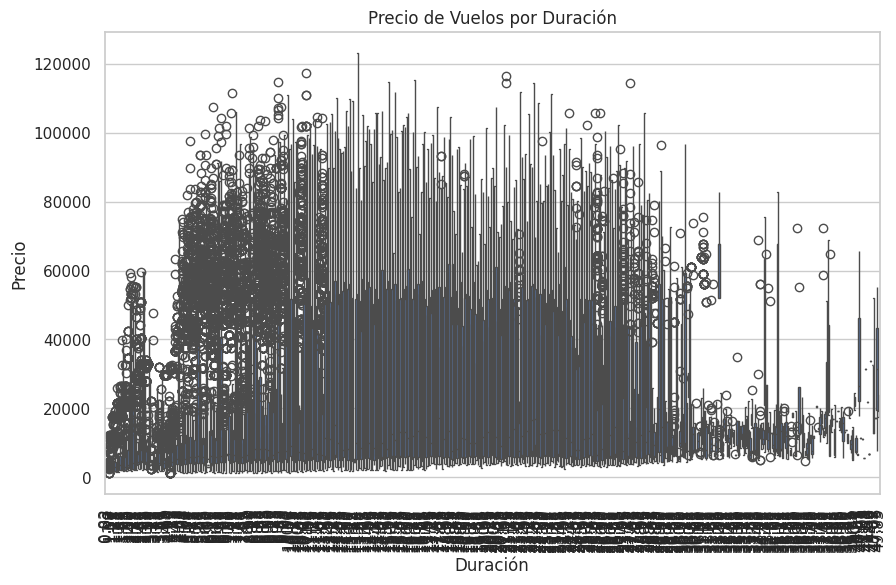

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', y='price', data=df)
plt.title('Precio de Vuelos por Duración')
plt.xlabel('Duración')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

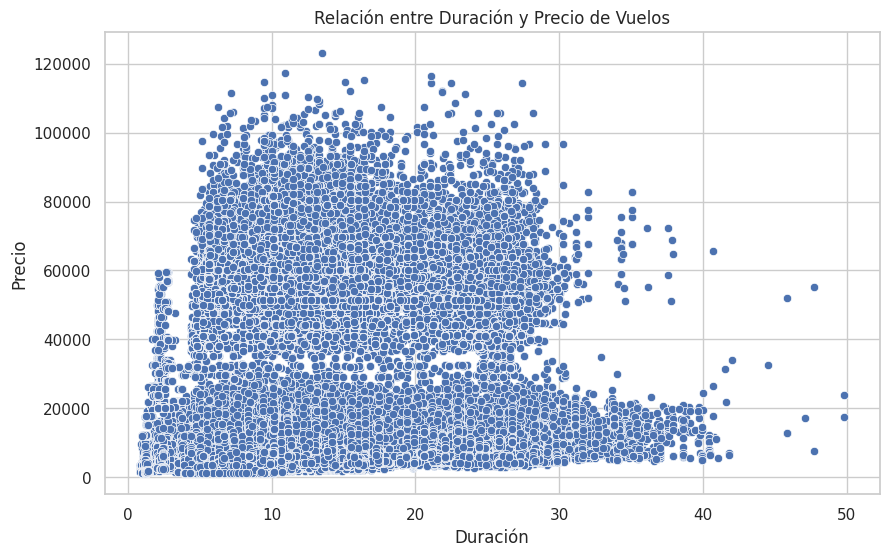

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=df)
plt.title('Relación entre Duración y Precio de Vuelos')
plt.xlabel('Duración')
plt.ylabel('Precio')
plt.show()

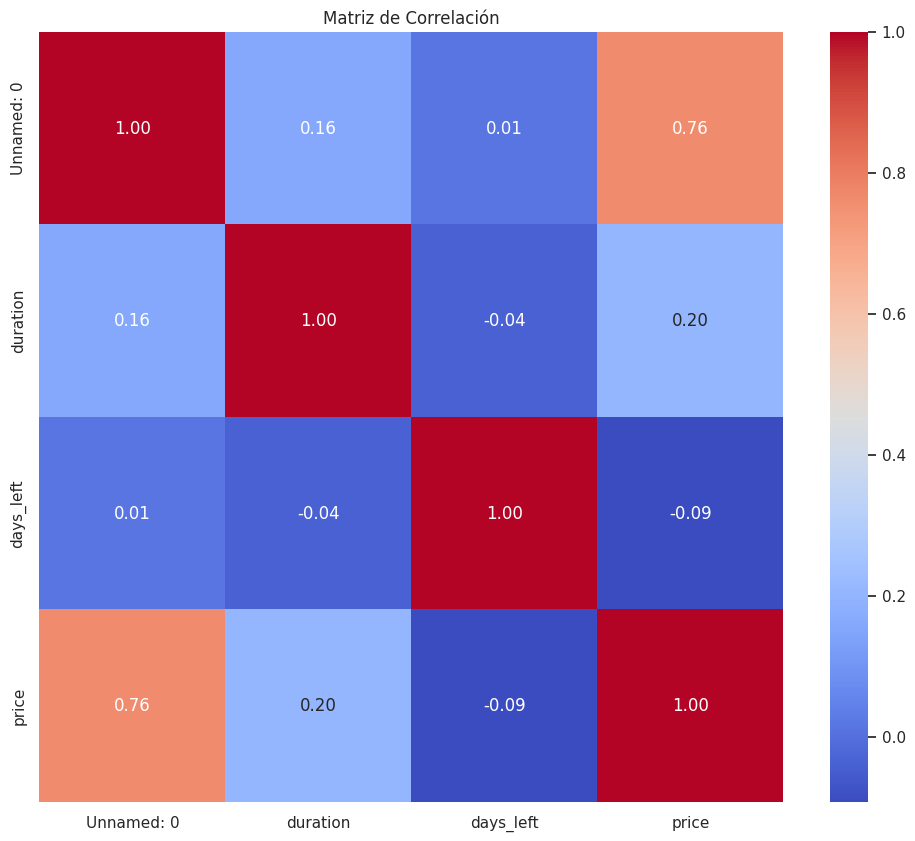

In [10]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [5]:
X = df.drop(['price', 'Unnamed: 0', 'flight'], axis=1)
y = df['price']

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **EXPLORACIÓN DE MODELOS**

In [14]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 2798.3857733396403


In [19]:
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest R^2:", rf_r2)

Random Forest R^2: 0.9848084728845997


In [16]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [18]:
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print("Decision Trees RMSE:", dt_rmse)

Decision Trees RMSE: 3538.8457846436686


In [20]:
dt_r2 = r2_score(y_test, dt_pred)
print("Decision Trees R^2:", dt_r2)

Decision Trees R^2: 0.9757054119421296


In [ ]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

In [10]:
svm_pred = svm_model.predict(X_test)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
print("Support Vector Machines RMSE:", svm_rmse)

NameError: name 'svm_model' is not defined

In [ ]:
svm_r2 = r2_score(y_test, svm_pred)
print("Support Vector Machines R^2:", svm_r2)

Al comparar los modelos, buscamos aquel con el RMSE más bajo y el R^2 más alto. Sin embargo, también debemos considerar la complejidad del modelo y el tiempo de entrenamiento.
Random Forest es el mejor modelo en este caso, ya que tiene el RMSE más bajo y el R^2 más alto entre los modelos comparados. Esto indica que Random Forest proporciona el mejor ajuste y las predicciones más precisas para los precios de los vuelos en tu conjunto de datos.